In [13]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [14]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for NVIDIA
ticker = "NVDA"

# Download historical market data (adjusted close prices)
nvda_data = yf.download(ticker, start="2020-01-01", end="2025-01-30")  # Adjust date range as needed

# Save the data to a CSV file
csv_filename = "/Users/andrechuabio/Documents/nvidia_stock_history.csv"
nvda_data.to_csv(csv_filename)

print(f"NVIDIA stock data saved to {csv_filename}")


[*********************100%***********************]  1 of 1 completed

NVIDIA stock data saved to /Users/andrechuabio/Documents/nvidia_stock_history.csv


In [15]:
import pandas as pd
df=pd.read_csv("/Users/andrechuabio/Documents/nvidia_stock_history.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,5.968750,5.997750,5.918000,5.997750,5.972711,237536000
1,2020-01-03,5.877500,5.945750,5.852500,5.901750,5.877111,205384000
2,2020-01-06,5.808000,5.931750,5.781750,5.926500,5.901757,262636000
3,2020-01-07,5.955000,6.044250,5.909750,5.998250,5.973209,314856000
4,2020-01-08,5.994000,6.051000,5.953750,6.009500,5.984413,277108000
...,...,...,...,...,...,...,...
1271,2025-01-23,145.050003,147.229996,143.720001,147.220001,147.220001,155915500
1272,2025-01-24,148.369995,148.970001,141.880005,142.619995,142.619995,234657600
1273,2025-01-27,124.800003,128.399994,116.699997,118.419998,118.419998,818830900
1274,2025-01-28,121.809998,129.000000,116.250000,128.990005,128.990005,579666400


In [16]:
df=df[['Date','Close']]
df

,Date,Close
0,2020-01-02,5.997750
1,2020-01-03,5.901750
2,2020-01-06,5.926500
3,2020-01-07,5.998250
4,2020-01-08,6.009500
...,...,...
1271,2025-01-23,147.220001
1272,2025-01-24,142.619995
1273,2025-01-27,118.419998
1274,2025-01-28,128.990005


In [17]:
import datetime
def str_to_datetime(s):
    split=s.split('-')
    year, month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)

datetime_obj=str_to_datetime("2025-01-29")
datetime_obj

datetime.datetime(2025, 1, 29, 0, 0)

In [18]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/8v/3xq4c19x4c7cqbwsh7psl5z00000gn/T/ipykernel_29476/1876721881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
1271   2025-01-23
1272   2025-01-24
1273   2025-01-27
1274   2025-01-28
1275   2025-01-29
Name: Date, Length: 1276, dtype: datetime64[ns]

In [19]:
df.index=df.pop('Date')
df

,Close
Date,
2020-01-02,5.997750
2020-01-03,5.901750
2020-01-06,5.926500
2020-01-07,5.998250
2020-01-08,6.009500
...,...
2025-01-23,147.220001
2025-01-24,142.619995
2025-01-27,118.419998


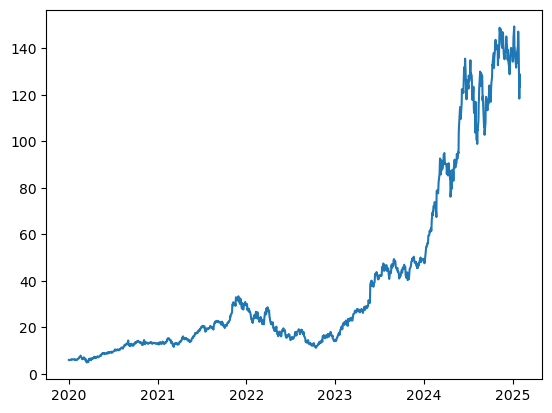

In [20]:
import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])

In [24]:
import numpy as np



def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2020-01-02'
windowed_df = df_to_windowed_df(df, 
                                '2020-02-02', 
                                '2025-01-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-02-02,6.199250,6.138500,6.145250,5.910750
1,2020-02-04,6.145250,5.910750,6.008250,6.178250
2,2020-02-05,5.910750,6.008250,6.178250,6.269000
3,2020-02-06,6.008250,6.178250,6.269000,6.356250
4,2020-02-07,6.178250,6.269000,6.356250,6.289750
...,...,...,...,...,...
1250,2025-01-23,137.710007,140.830002,147.070007,147.220001
1251,2025-01-24,140.830002,147.070007,147.220001,142.619995
1252,2025-01-27,147.070007,147.220001,142.619995,118.419998
1253,2025-01-28,147.220001,142.619995,118.419998,128.990005


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()#convert to numpy

  dates = df_as_np[:, 0] # get dates and rows ( only need first column)

  middle_matrix = df_as_np[:, 1:-1] # not final input matrix
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1)) #make sure its in the right shape for model

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1255,), (1255, 3, 1), (1255,))

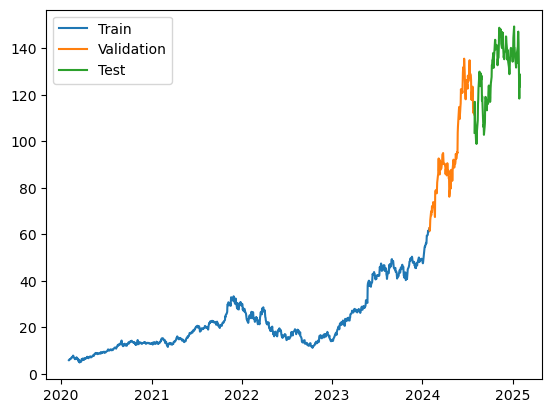

In [27]:
q_80 = int(len(dates) * .8) # split data into train,test, validation
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [28]:
from tensorflow.keras.models import Sequential #sequential model
from tensorflow.keras.optimizers import Adam  # optimizer
from tensorflow.keras import layers  #sequential with many layers

model = Sequential([layers.Input((3, 1)),# 3 days in past and 1 feature 
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 558.0873 - mean_absolute_error: 20.2621 - val_loss: 8928.6914 - val_mean_absolute_error: 92.2568
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 287.3323 - mean_absolute_error: 12.0979 - val_loss: 6304.1611 - val_mean_absolute_error: 76.5749
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.0601 - mean_absolute_error: 7.7525 - val_loss: 4310.8555 - val_mean_absolute_error: 62.2906
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3944 - mean_absolute_error: 1.9195 - val_loss: 2723.5449 - val_mean_absolute_error: 47.9684
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5149 - mean_absolute_error: 0.7031 - val_loss: 2455.1987 - val_mean_absolute_error: 45.1194
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1106 - mean_absolute_error: 0.6412 - val_loss: 2294.4758 - val_mean_absolute_error: 43.3274
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1707 - mean_

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


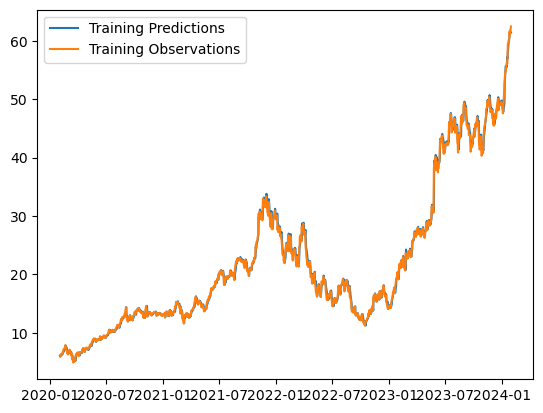

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


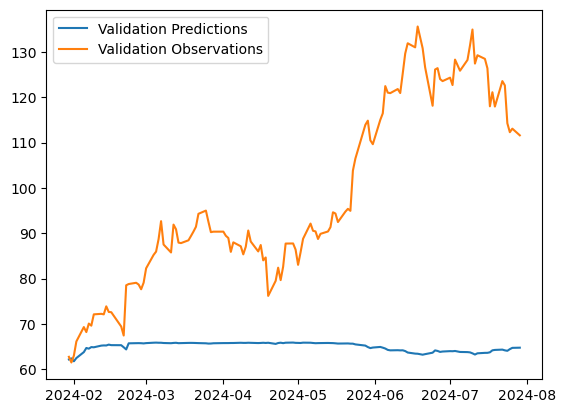

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


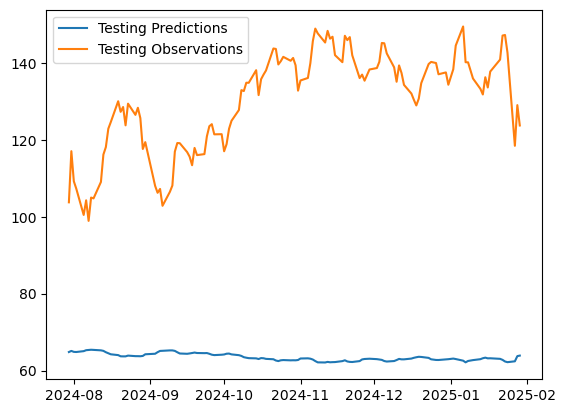

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

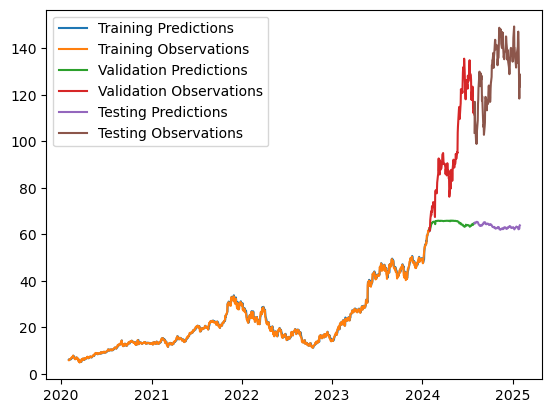

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [33]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

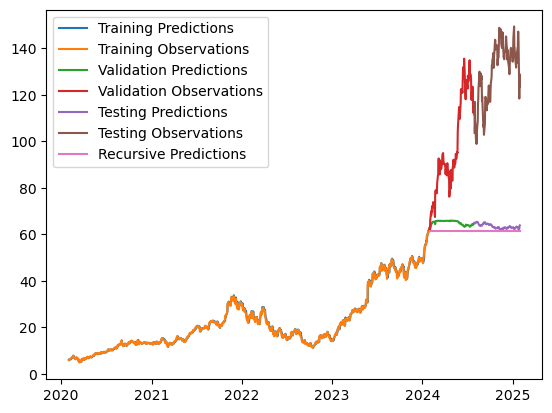

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])